###**Project Name:**

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

####**Load and Explore Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data_Sets/twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Assign column name (ID, Entity, Sentiment, Tweet)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Remove Unnecessary column
df.drop(['ID','Entity'], axis=1, inplace=True)
df.head()

,Sentiment,Tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [13]:
df.shape

(74681, 2)

In [12]:
df.isnull().sum()

,0
Sentiment,0
Tweet,686


In [14]:
# Remove Missign Value in tweet column
df.dropna(subset=['Tweet'], inplace=True)

/tmp/ipython-input-15-1726936920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


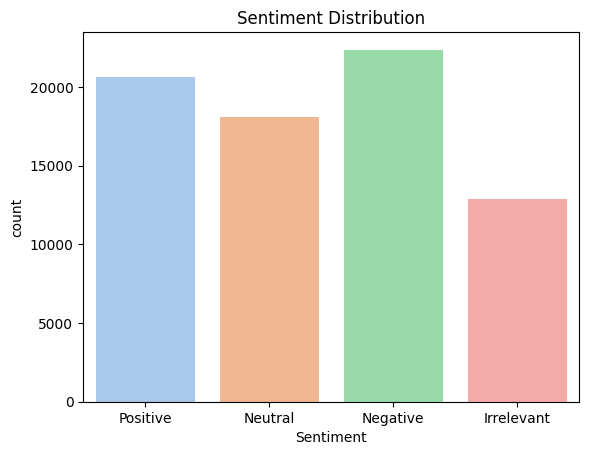

In [15]:
# Sentiment Distribution
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.show()

####**Data Preprocessing**

In [19]:
# Clean the text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)         # remove Url
    text = re.sub(r'@\w+|#\w+', '', text)                       # remove mentions/hashtags
    text = re.sub(r'\d+', '', text)                             # remove digits
    text = text.lower()                                         # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_tweet'] = df['Tweet'].apply(clean_text)

####**Encode Sentiments**

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])  # maps labels to 0, 1, 2, etc.


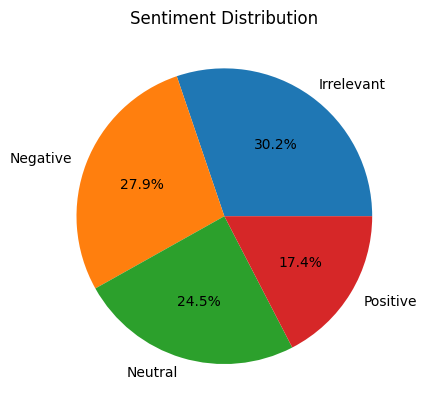

In [28]:
# pie Chart
plt.pie(df['label'].value_counts(), labels=le.classes_, autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()

####**Split the Dataset**

In [21]:
X = df['cleaned_tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####**TF-IDF Vectorization**

In [22]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


####**Train SVM Classifier**

In [24]:
svm = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

####**Evaluate the Model**

In [25]:
y_pred = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6988310020947361
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.68      0.56      0.62      2624
    Negative       0.70      0.81      0.75      4463
     Neutral       0.71      0.62      0.67      3589
    Positive       0.70      0.73      0.72      4123

    accuracy                           0.70     14799
   macro avg       0.70      0.68      0.69     14799
weighted avg       0.70      0.70      0.70     14799

